In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from ast import literal_eval
import statistics
import nltk
import re
from scipy import stats
from venn import venn
import matplotlib
import squarify    
%matplotlib inline

In [29]:
def calc_ingredient_ratings(ingredient_list, ingredient_freq= ingredient_freq):
    #print(ingredient_list) 
    rating = 0
    for ingredient in ingredient_list:
        try:
            freq = ingredient_freq.loc[ingredient]
        except:
            freq = 0
        rating += freq
    return rating

In [78]:
def get_recipes(search_phrase, recipes):
    recipe_list = recipes.loc[recipes['name'].str.contains(search_phrase, case=False)].copy()
    recipe_list['ingredient_score'] = recipe_list['mod_ingredients'].apply(calc_ingredient_ratings)
    recipe_list['overall_score'] = stats.zscore(recipe_list['minutes']) + recipe_list['avg_rating']*recipe_list['n_ratings'] + recipe_list['ingredient_score']*100 + stats.zscore(recipe_list['n_steps']) + stats.zscore(recipe_list['n_ingredients'])
    return recipe_list

In [48]:
def show_top_recipes(recipe_list):
    html = 'https://www.food.com/recipe/'
    common_ingredients = recipe_list['mod_ingredients'].apply(literal_eval).explode().value_counts()
    cmap = matplotlib.cm.Blues
    norm = matplotlib.colors.Normalize(vmin=min(common_ingredients), vmax=max(common_ingredients))
    colors = [cmap(norm(value)) for value in common_ingredients]
    squarify.plot(sizes=common_ingredients[:10], label=common_ingredients.index[:10], alpha=.5, text_kwargs={"wrap": True})
    plt.axis('off')
    plt.show()
    top_5 = recipe_list.nlargest(5, 'overall_score').copy()
    top_5['recipe_link'] = [f'https://www.food.com/recipe/{ing_id}' for ing_id in top_5['id']]
    return top_5[['name','id','overall_score','recipe_link']]

In [ ]:
recipes = pd.read_csv('data/large_data/recipes.csv')
ingredient_freq = pd.read_csv('data/ingredient_freq.csv')

In [80]:
def main():
    search_phrase = input('Please enter your recipe: ')
    #search_words = search_phrase.split(" ")
    #search_words = "|".join("^{}$".format(word) for word in search_words)
    recipe_list = get_recipes(search_phrase, recipes)
    return show_top_recipes(recipe_list)

Please enter your recipe: brownies


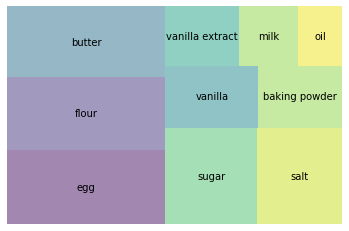

,name,id,overall_score,recipe_link
566,whatever floats your boat brownies,32204,5522.925065,https://www.food.com/recipe/32204
154748,perfect chocolate brownies,15072,1418.507021,https://www.food.com/recipe/15072
115389,kittencal s extreme chocolate brownies,87925,1119.968363,https://www.food.com/recipe/87925
199861,super peanut butter filled brownies,87864,689.682194,https://www.food.com/recipe/87864
109057,intensely chocolate cocoa brownies,118242,548.983287,https://www.food.com/recipe/118242


In [79]:
main()